## Movie Recommendation System using Apriori Alogorithm

### Importing the libraries

In [101]:
import numpy as np
import pandas as pd
from collections import defaultdict
import sys
from operator import itemgetter
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the datasets

In [102]:
movie_name_file = "movie.item"
movies = pd.read_csv(movie_name_file,delimiter="|",header=None,encoding="mac-roman")
movies.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [106]:
file = "rating.data"
ratings = pd.read_csv(file,delimiter='\t',header=None,names = ['UserID','MovieID','Rating','Datetime'])
ratings[:5]
ratings.drop(['Datetime'],axis=1,inplace=True)
ratings.head()

,UserID,MovieID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [107]:
ratings.shape[0]

100000

#### Checking for null values

In [108]:
ratings.isnull().sum()

UserID     0
MovieID    0
Rating     0
dtype: int64

Text(0.5, 1.0, 'Count of movies with corresponding rating')

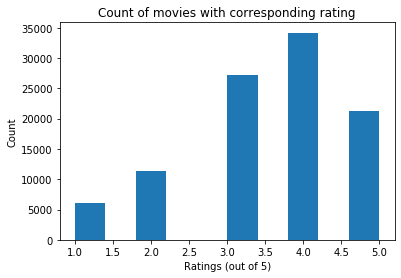

In [110]:
plt.hist(ratings['Rating'])
plt.xlabel('Ratings (out of 5)')
plt.ylabel('Count')
plt.title('Count of movies with corresponding rating')

#### Number of ratings per movie

In [113]:
ratings_count = ratings.groupby(by="MovieID")['Rating'].count().reset_index().rename(columns={'Rating':'totalRatings'})[['MovieID','totalRatings']]
ratings_count

,MovieID,totalRatings
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86
...,...,...
1677,1678,1
1678,1679,1
1679,1680,1
1680,1681,1


In [114]:
ratings_total = pd.merge(ratings,ratings_count,on='MovieID',how='left')
ratings_total

,UserID,MovieID,Rating,totalRatings
0,196,242,3,117
1,186,302,3,297
2,22,377,1,13
3,244,51,2,81
4,166,346,1,126
...,...,...,...,...
99995,880,476,3,160
99996,716,204,5,350
99997,276,1090,1,37
99998,13,225,2,109


In [115]:
ratings_total['totalRatings'].describe()

count    100000.000000
mean        168.071900
std         121.784558
min           1.000000
25%          71.000000
50%         145.000000
75%         239.000000
max         583.000000
Name: totalRatings, dtype: float64

#### Determining if a person is recommending a movie

In [117]:
ratings["recom"] = ratings["Rating"] > 3
ratings[10:15]

ratings[ratings["UserID"] == 1][:5]

,UserID,MovieID,Rating,recom
202,1,61,4,True
305,1,189,3,False
333,1,33,4,True
334,1,160,4,True
478,1,20,4,True


In [118]:
#Selecting the top 200 users
top200 = ratings[ratings['UserID'].isin(range(200))]
#Selecting the favorable reviews
favorable_ratings = top200[top200['recom'] == True]
favorable_ratings[:5]

,UserID,MovieID,Rating,recom
16,122,387,5,True
20,119,392,4,True
21,167,486,4,True
26,38,95,5,True
28,63,277,4,True


In [121]:
#Putting then user recommended movie in a collection
favorable_reviews = dict((k, frozenset(v.values)) for k, v in favorable_ratings.groupby("UserID")["MovieID"])
print(favorable_reviews[1])
print(len(favorable_reviews))

frozenset({1, 3, 6, 7, 9, 12, 13, 14, 15, 16, 18, 19, 20, 22, 23, 25, 28, 32, 33, 39, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 64, 65, 66, 68, 72, 75, 76, 77, 79, 80, 81, 82, 84, 86, 87, 88, 89, 90, 91, 93, 95, 96, 98, 100, 106, 107, 108, 109, 111, 113, 114, 115, 119, 121, 123, 124, 127, 128, 129, 132, 133, 134, 135, 137, 144, 146, 150, 151, 152, 154, 156, 157, 160, 161, 162, 163, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 181, 182, 183, 184, 185, 186, 187, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 202, 203, 204, 206, 207, 208, 209, 210, 212, 214, 216, 221, 222, 223, 224, 227, 228, 229, 230, 234, 235, 236, 238, 239, 241, 242, 246, 248, 249, 250, 251, 253, 256, 257, 258, 265, 267, 268, 269, 270})
199


#### Calculating the number of recommendations for a movie

In [123]:
num_recs_per_movie = top200[["MovieID","recom"]].groupby("MovieID").sum()
num_recs_per_movie.sort_values("recom",ascending=False)[:5]

,recom
MovieID,
50,100.0
100,89.0
258,83.0
181,79.0
174,74.0


### Applying the Apriori Algorithm

#### 1. Creating a frequent itemset

In [124]:
def frequent_itemsets_fn(favorable_reviews,k_itemsets,min_support):
    counts = defaultdict(int)
    # iterate over all of the users and their reviews
    for user,review in favorable_reviews.items():
        # see whether itemset is a subset of the reviews or not
        for itemset in k_itemsets:
            if itemset.issubset(review):
                for other_reviewed_movie in review-itemset:
                    current_superset = itemset|frozenset((other_reviewed_movie,))
                    counts[current_superset] += 1
    return dict([(itemset,frequence) for itemset,frequence in counts.items() if frequence >= min_support])

frequent_itemsets={}
min_support = 50
#Frequent item set of length 1
frequent_itemsets[1] = dict((frozenset((movie_id,)),row['recom']) for movie_id,row in num_recs_per_movie.iterrows() if row['recom'] > min_support)
print("There are {0} movies with more than {1} favor reviews.".format(len(frequent_itemsets[1]),min_support))
for k in range(2,20):
         #Generate k frequent itemsets by k-1 frequent itemsets
    cur_frequent_itemsets = frequent_itemsets_fn(favorable_reviews,frequent_itemsets[k-1],min_support)
    if len(cur_frequent_itemsets) == 0:
        print("Did not any frequent itemsets of length {}".format(k))
        sys.stdout.flush()
        break
    else:
        print("I found {} frequent itemsets of length {}".format(len(cur_frequent_itemsets),k))
        sys.stdout.flush()
        frequent_itemsets[k] = cur_frequent_itemsets
 # Frequent itemsets of length 1 is not required
del frequent_itemsets[1]
print("Found a total of {} frequent itemsets.".format(sum(len(frequent_item) for frequent_item in frequent_itemsets.values())))

There are 16 movies with more than 50 favor reviews.
I found 93 frequent itemsets of length 2
I found 295 frequent itemsets of length 3
I found 593 frequent itemsets of length 4
I found 785 frequent itemsets of length 5
I found 677 frequent itemsets of length 6
I found 373 frequent itemsets of length 7
I found 126 frequent itemsets of length 8
I found 24 frequent itemsets of length 9
I found 2 frequent itemsets of length 10
Did not any frequent itemsets of length 11
Found a total of 2968 frequent itemsets.


#### 2. Creating an association rule

In [125]:
#The rules will be candidate rules until tested
candidate_rules = []

for itemset_length,itemset_counts in frequent_itemsets.items():
    for itemset in itemset_counts.keys():
                 # Take one of the items as a conclusion, others as a premise
        for conclusion in itemset:
            premise = itemset - set((conclusion,))
            candidate_rules.append((premise,conclusion))
print("There are {} candidate rules in total.".format(len(candidate_rules)))
print(candidate_rules[:5])

There are 15285 candidate rules in total.
[(frozenset({7}), 1), (frozenset({1}), 7), (frozenset({50}), 1), (frozenset({1}), 50), (frozenset({1}), 56)]


In [126]:
#Calculating the confidence of each rule
correct_counts = defaultdict(int)
incorrect_counts = defaultdict(int)

for user,reviews in favorable_reviews.items():
    for candidate_rule in candidate_rules:
        premise,conclusion = candidate_rule
        if premise.issubset(reviews):
            if conclusion in reviews:
                correct_counts[candidate_rule] += 1
            else:
                incorrect_counts[candidate_rule] += 1
rule_confidence = {candidate_rule: correct_counts[candidate_rule] / float(correct_counts[candidate_rule] + incorrect_counts[candidate_rule])
                      for candidate_rule in candidate_rules}

In [127]:
#Setting the minimum confidence
min_confidence = 0.9
#Filtering out the poor rules
rule_confidence = {rule: confidence for rule,confidence in rule_confidence.items() if confidence > min_confidence}
print(len(rule_confidence))

5152


#### 3. Rule Ordering

In [128]:
sort_confidence = sorted(rule_confidence.items(),key=itemgetter(1),reverse = True)
for index in range(0,5):
    print("Rule #{0}:".format(index+1))
    premise,conclusion = sort_confidence[index][0]
    print("Rule: If a person recommends {0} they will also recommend {1}".format(premise,conclusion))
    print("- Confidence: {0:.1f}%".format(sort_confidence[index][1]))

Rule #1:
Rule: If a person recommends frozenset({98, 181}) they will also recommend 50
- Confidence: 1.0%
Rule #2:
Rule: If a person recommends frozenset({172, 79}) they will also recommend 174
- Confidence: 1.0%
Rule #3:
Rule: If a person recommends frozenset({258, 172}) they will also recommend 174
- Confidence: 1.0%
Rule #4:
Rule: If a person recommends frozenset({1, 181, 7}) they will also recommend 50
- Confidence: 1.0%
Rule #5:
Rule: If a person recommends frozenset({1, 172, 7}) they will also recommend 174
- Confidence: 1.0%


In [129]:
movies.columns = ["MovieID", "Title", "Release Date", "Video Release", "IMDB", "<UNK>", "Action", "Adventure",
                           "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir",
                           "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

def get_movie_name(movie_id):
    title_object = movies[movies["MovieID"] == movie_id]["Title"]
    title = title_object.values[0]
    return title

get_movie_name(1)

for index in range(0,5):
    print("Rule #{0}:".format(index+1))
    premise,conclusion = sort_confidence[index][0]
    premise_name = ", ".join(get_movie_name(idx) for idx in premise)
    conclusion_name = get_movie_name(conclusion)
    print("Rule: If a person recommends {0} they will also recommend {1}".format(premise_name,conclusion_name))
    print("- Confidence: {0:.1f}%".format(sort_confidence[index][1]))

Rule #1:
Rule: If a person recommends Silence of the Lambs, The (1991), Return of the Jedi (1983) they will also recommend Star Wars (1977)
- Confidence: 1.0%
Rule #2:
Rule: If a person recommends Empire Strikes Back, The (1980), Fugitive, The (1993) they will also recommend Raiders of the Lost Ark (1981)
- Confidence: 1.0%
Rule #3:
Rule: If a person recommends Contact (1997), Empire Strikes Back, The (1980) they will also recommend Raiders of the Lost Ark (1981)
- Confidence: 1.0%
Rule #4:
Rule: If a person recommends Toy Story (1995), Return of the Jedi (1983), Twelve Monkeys (1995) they will also recommend Star Wars (1977)
- Confidence: 1.0%
Rule #5:
Rule: If a person recommends Toy Story (1995), Empire Strikes Back, The (1980), Twelve Monkeys (1995) they will also recommend Raiders of the Lost Ark (1981)
- Confidence: 1.0%


#### 4. Model Evaluation

In [130]:
#Creating a test set
test_data = ratings[~ratings['UserID'].isin(range(200))]
test_favor = test_data[test_data["recom"]]
test_favor_by_users = dict((k,frozenset(v.values)) for k,v in test_favor.groupby('UserID')['MovieID'])
test_data[:5]

,UserID,MovieID,Rating,recom
3,244,51,2,False
5,298,474,4,True
7,253,465,5,True
8,305,451,3,False
11,286,1014,5,True


In [131]:
#Applying the Apriori Algorithm on the test set
correct_counts = defaultdict(int)
incorrect_counts = defaultdict(int)
for user,reviews in test_favor_by_users.items():
    for candidate_rule in candidate_rules:
        premise,conclusion = candidate_rule
        if premise.issubset(reviews):
            if conclusion in reviews:
                correct_counts[candidate_rule] += 1
            else:
                incorrect_counts[candidate_rule] += 1
test_confidence = {candidate_rule: correct_counts[candidate_rule] / float(correct_counts[candidate_rule]+incorrect_counts[candidate_rule]) 
                   for candidate_rule in rule_confidence}
print(len(test_confidence))

sort_test_confidence = sorted(test_confidence.items(),key=itemgetter(1),reverse = True)
print(sort_test_confidence[:5])

5152
[((frozenset({64, 1, 7, 79, 50}), 174), 1.0), ((frozenset({64, 1, 98, 7, 79}), 174), 1.0), ((frozenset({64, 1, 7, 172, 79}), 174), 1.0), ((frozenset({64, 1, 7, 79, 181}), 174), 1.0), ((frozenset({64, 1, 172, 79, 56}), 174), 1.0)]


In [132]:
#Calculating the test set results
for index in range(5):
    print("Rule #{0}:".format(index+1))
    premise,conclusion = sort_confidence[index][0]
    premise_name = ", ".join(get_movie_name(idx) for idx in premise)
    conclusion_name = get_movie_name(conclusion)
    print("Rule: If a person recommends {0} they will also recommend {1}".format(premise_name,conclusion_name))
    print("- Train Confidence: {0:.1f}%".format(rule_confidence.get((premise,conclusion),-1)*100))
    print("- Test Confidence: {0:.1f}%".format(test_confidence.get((premise,conclusion),-1)*100))

Rule #1:
Rule: If a person recommends Silence of the Lambs, The (1991), Return of the Jedi (1983) they will also recommend Star Wars (1977)
- Train Confidence: 100.0%
- Test Confidence: 93.6%
Rule #2:
Rule: If a person recommends Empire Strikes Back, The (1980), Fugitive, The (1993) they will also recommend Raiders of the Lost Ark (1981)
- Train Confidence: 100.0%
- Test Confidence: 87.6%
Rule #3:
Rule: If a person recommends Contact (1997), Empire Strikes Back, The (1980) they will also recommend Raiders of the Lost Ark (1981)
- Train Confidence: 100.0%
- Test Confidence: 84.1%
Rule #4:
Rule: If a person recommends Toy Story (1995), Return of the Jedi (1983), Twelve Monkeys (1995) they will also recommend Star Wars (1977)
- Train Confidence: 100.0%
- Test Confidence: 93.2%
Rule #5:
Rule: If a person recommends Toy Story (1995), Empire Strikes Back, The (1980), Twelve Monkeys (1995) they will also recommend Raiders of the Lost Ark (1981)
- Train Confidence: 100.0%
- Test Confidence: 90